In [290]:
import seaborn as sns
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
import re

import plotly as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# modeling
# from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import grangercausalitytests

pd.set_option('display.max_columns', 500)
title_fontsize = 15

In [2]:
# # assigning dfs to files
# df1 = pd.read_csv('./data/cleaned_up_data/all_stock_sentiment.csv').iloc[:, 1:].dropna().drop_duplicates()
# df2 = pd.read_csv('./data/cleaned_up_data/scraped_sentiment_dframes.csv').iloc[:, 3:].dropna().drop_duplicates()
# df3 = pd.read_csv('./data/cleaned_up_data/scraped_sentiment_extra.csv').iloc[:, 1:].dropna().drop_duplicates()
# df4 = pd.read_csv('./data/cleaned_up_data/scraped_sentiment_extra2.csv').iloc[:, 1:].dropna().drop_duplicates()
# df5 = pd.read_csv('./data/cleaned_up_data/scraped_sentiment_extra3.csv').iloc[:, 2:].dropna().drop_duplicates()
# stocks = pd.read_csv('./data/cleaned_up_data/scraped_stock_2015_2023.csv')

# # combining and cleaning
# df1.columns = ['Text', 'Datetime', 'Stock Name', 'sentiment']
# df = pd.concat([df2, df1, df3, df4, df5], ignore_index=True)
# df['Datetime'] = pd.to_datetime(df.Datetime, utc=True).dt.date
# df = df.drop_duplicates().sort_values('Datetime').reset_index(drop=True)

# # remove unwanted companies/years
# df = df[~(pd.to_datetime(df.Datetime).dt.year == 2014)]
# df = df[~(df['Stock Name'] == 'F')]
# df = df[~(df['Stock Name'] == 'INTC')]
# df = df[~(df['Stock Name'] == 'ENPH')]
# df = df[~(df['Stock Name'] == 'AMD')]
# df = df[~(df['Stock Name'] == 'XPEV')]
# df = df[~(df['Stock Name'] == 'VZ')]

# # convert stocks datetime to date-type
# stocks.Date = pd.to_datetime(stocks.Date).dt.date

# df = df.reset_index(drop=True)
# df2 = df.copy()

/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_96556/1359225848.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./data/cleaned_up_data/scraped_sentiment_dframes.csv').iloc[:, 3:].dropna().drop_duplicates()


In [10]:
# df2.to_csv('./data/cleaned_up_data/final_cleaned.csv', index=False)

In [3]:
# # check balance of dataset

# dff = df2.copy()
# dff[['Datetime', 'Stock Name']]
# dff['Datetime'] = pd.to_datetime(dff.Datetime).dt.year

# dff = dff.groupby(['Datetime', 'Stock Name']).count().reset_index()
# dff.pivot(index='Stock Name', columns='Datetime', values='sentiment')

Datetime,2015,2016,2017,2018,2019,2020,2021,2022,2023
Stock Name,,,,,,,,,
AAPL,298640,365980,185627,192194,186868,49775,49747,51806,26773
AMZN,80594,104223,110263,103469,90536,49800,49484,49413,26258
BA,6086,5990,3119,2928,2566,3380,2031,3962,4966
BX,1786,1701,1467,1240,1229,1210,1229,1416,996
COST,2363,2005,1958,1803,1758,1779,1677,5002,20206
CRM,3488,3274,3529,2563,1832,2494,15049,3143,4970
DIS,1695,1652,920,1131,1501,1288,1185,1304,25012
GOOG,126183,133284,73876,71082,62196,49425,49061,50020,4962
KO,3650,2818,2587,1450,1361,6635,1655,1614,4935


In [4]:
# # check balance of dataset

# dff = df2.copy()
# dff[['Datetime', 'Stock Name']]
# dff['Datetime'] = pd.to_datetime(dff.Datetime).dt.year

# dff = dff.groupby(['Datetime', 'Stock Name']).count().reset_index()
# dff.pivot(index='Stock Name', columns='Datetime', values='sentiment')

Datetime,2015,2016,2017,2018,2019,2020,2021,2022,2023
Stock Name,,,,,,,,,
AAPL,298640,365980,185627,192194,186868,49775,49747,51806,26773
AMZN,80594,104223,110263,103469,90536,49800,49484,49413,26258
BA,6086,5990,3119,2928,2566,3380,2031,3962,4966
BX,1786,1701,1467,1240,1229,1210,1229,1416,996
COST,2363,2005,1958,1803,1758,1779,1677,5002,20206
CRM,3488,3274,3529,2563,1832,2494,15049,3143,4970
DIS,1695,1652,920,1131,1501,1288,1185,1304,25012
GOOG,126183,133284,73876,71082,62196,49425,49061,50020,4962
KO,3650,2818,2587,1450,1361,6635,1655,1614,4935


In [5]:
# # setting up the data to be passed to the chart

# df = df2.copy()
# df['label'] = df['sentiment'].apply(lambda x: 'bullish' if x > 0.5 else 'bearish')

# sent_avg_sum = df.groupby(['Datetime', 'Stock Name'], as_index=False).agg({
#     'sentiment': ['mean', 'count']})
# sent_avg_sum.columns = ['Datetime', 'Stock Name', 'sentiment avg', 'sent_total']

# sent_count = df.groupby(['Datetime', 'Stock Name', 'label'], as_index=False)['sentiment'].count().rename(
#     columns={'sentiment': 'sent_count'})

# df = pd.merge(sent_avg_sum, sent_count, on=['Datetime', 'Stock Name'])

# df['sentiment pct'] = df['sent_count'] / df['sent_total']
# df.drop(['sent_count', 'sent_total'], axis=1, inplace=True)
# df.rename(columns={'Datetime': 'Date'}, inplace=True)

# df = df.merge(stocks, on=['Date', 'Stock Name'])

In [37]:
# df.to_csv('./data/cleaned_up_data/final_stock_tweets_summary.csv', index_label=False)

In [10]:
tweets_df = pd.read_csv('./data/cleaned_up_data/final_stock_tweets_summary.csv')

# Analysis

In [15]:
tweets_df[tweets_df['Stock Name'] == company].copy()

,Date,Stock Name,sentiment avg,label,sentiment pct,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,0.688692,bearish,0.306551,27.847500,27.860001,26.837500,27.332500,24.603210,212818400
1,2015-01-02,AAPL,0.688692,bullish,0.693449,27.847500,27.860001,26.837500,27.332500,24.603210,212818400
15,2015-01-05,AAPL,0.660067,bearish,0.343434,27.072500,27.162500,26.352501,26.562500,23.910091,257142000
16,2015-01-05,AAPL,0.660067,bullish,0.656566,27.072500,27.162500,26.352501,26.562500,23.910091,257142000
34,2015-01-06,AAPL,0.723693,bearish,0.273719,26.635000,26.857500,26.157499,26.565001,23.912342,263188400
...,...,...,...,...,...,...,...,...,...,...,...
46511,2023-02-27,AAPL,0.806079,bullish,0.808577,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
46546,2023-02-28,AAPL,0.783075,bearish,0.215167,147.050003,149.080002,146.830002,147.410004,147.410004,50547000
46547,2023-02-28,AAPL,0.783075,bullish,0.784833,147.050003,149.080002,146.830002,147.410004,147.410004,50547000
46582,2023-03-01,AAPL,0.733398,bearish,0.262001,146.830002,147.229996,145.009995,145.309998,145.309998,55387700


In [19]:
def update_line_chart(company):

    if company == 'All':
        # change this when you're done with testing
        company = 'AAPL'
        
    data = tweets_df[tweets_df['Stock Name'] == company].copy()

    data['SMA30'] = data['sentiment avg'].rolling(50).mean()
    data['SMA90'] = data['sentiment avg'].rolling(90).mean()
    
    data['label'] = np.where(data['SMA30']>data['SMA90'], 1, 0)
    data['group'] = data['label'].ne(data['label'].shift()).cumsum()

    # create subplot layout
    fig = make_subplots(
        rows=4, cols=1, 
        row_heights=[4, 3.5, 3.5, 2],
        vertical_spacing=0.05,
        x_title='Date',
        shared_xaxes=True
    )
######## subplot 1: sentiment ########
    # grouping colors by trace crosses
    combined1 = data.copy()
    combined = data.groupby('group')
    combined_s = []
    for _, dta in combined:
        combined_s.append(dta)

    # custom function to set fill colors
    def fillcol(label):
        if label >= 1:
            return 'rgba(0,250,0,0.4)'
        else:
            return 'rgba(250,0,0,0.4)'

    # make moving average lines transparrent
    for df in combined_s:
        fig.add_traces(go.Scatter(x=df.Date, y = df.SMA30,
                                line = dict(color='rgba(0,0,0,0)'),
                                hoverinfo='skip'
                                ))
        
        fig.add_traces(go.Scatter(x=df.Date, y = df.SMA90,
                                line = dict(color='rgba(0,0,0,0)'),
                                fill='tonexty', 
                                fillcolor = fillcol(df['label'].iloc[0]),
                                hoverinfo='skip'
                                ))

    # add colors for traces that cross MA
    fig.add_traces(go.Scatter(x=combined1.Date, y = combined1.SMA30,
                            line = dict(color = 'green', width=1), 
                            name='Short Term'
                            ))

    fig.add_traces(go.Scatter(x=combined1.Date, y = combined1.SMA90,
                            line = dict(color = 'red', width=1), 
                            name='Long term'
                            ))

######## subplot 2: stock ########

    # subplot 2A: stock price
    price_trace = go.Scatter(x=data['Date'],
                y=data['Adj Close'],
                mode='lines',
                marker_line_width=0,
                marker_color = 'blue',
                name="Adj Close")
    
    # subplot 2B: adding buy/sell signals
    def RSIcalc(df):
        df = df.copy() # or else a dreading warning sign will keep popping up
        df['MA200'] = df['Adj Close'].rolling(window=200).mean()
        df['price change'] = df['Adj Close'].pct_change()
        df['Upmove'] = df['price change'].apply(lambda x: x if x>0 else 0)
        df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x<0 else 0)
        df['avg Up'] = df['Upmove'].ewm(span=19).mean()
        df['avg Down'] = df['Downmove'].ewm(span=19).mean()
        df = df.dropna()
        df['RS'] = df['avg Up']/df['avg Down']
        df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
        df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
        df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
        return df
    
    def getSignals(df):
        Buying_dates=[]
        Selling_dates=[]
        
        for i in range(len(df)):
            if "Yes" in df['Buy'].iloc[i]:
                Buying_dates.append(df.iloc[i+1].name)
                for j in range(1, 11):
                    if df['RSI'].iloc[i+j] > 40:
                        Selling_dates.append(df.iloc[i+j+1].name)
                        break
                    elif j == 10:
                        Selling_dates.append(df.iloc[i+j+1].name)
        return Buying_dates, Selling_dates
    
    frame = RSIcalc(data)
    buy, sell = getSignals(frame)
    buy_trace = go.Scatter(x=pd.to_datetime(frame.loc[buy]['Date']), y = frame.loc[buy]['Adj Close'],
                              marker=dict(symbol='triangle-up', color='green'), 
                              mode = 'markers', name='Buy'
                            )
    sell_trace = go.Scatter(x=pd.to_datetime(frame.loc[sell]['Date']), y = frame.loc[sell]['Adj Close'],
                              marker=dict(symbol='triangle-up', color='red'), 
                              mode = 'markers', name='Sell'
                            )
    fig.add_traces([price_trace, buy_trace, sell_trace], rows=2, cols=1)

######## subplot 3: RSI ########
    
    trace1 = go.Scatter(
        x = pd.to_datetime(frame['Date']),
        y = frame['RSI'],
        name='RSI',
        mode='lines',
        marker_line_width=0,
        marker_color = 'orange',
        )
    trace2 = go.Scatter(x = pd.to_datetime(frame['Date']),
        y = np.repeat(30, len(frame['Date'])),
        name='oversold',
        line=dict(color='green', dash='dash'))
    trace3 = go.Scatter(x = pd.to_datetime(frame['Date']),
        y = np.repeat(70, len(frame['Date'])),
        name='overbought',
        line=dict(color='indianred', dash='dash'))
    fig.add_traces([trace1, trace2, trace3], rows=3, cols=1)

######## subplot 4: stock volume ########
    stock_vol = go.Bar(
        x = data['Date'],
        y = data['Volume'],
        name = 'Stock Volume',
        marker_color='rgb(158,202,225)',
        marker_line_width=0,
    )
    
    fig.add_trace(stock_vol, row=4, col=1)
    
    
######## subplot layouts ########

    # Set title
    fig.layout.update(title=f'{company} Stock Price v. Sentiment',
                     showlegend=True, hovermode='closest')

    # Set axis title
    fig.update_yaxes(title_text="Sentiment", row=1, col=1)
    fig.update_yaxes(title_text="Price", row=2, col=1)
    fig.update_yaxes(title_text="RSI", row=3, col=1)
    fig.update_yaxes(title_text="Volume", row=4, col=1)

    # hiding the bottom range window
    fig.update_layout(xaxis_rangeslider_visible=False)
    
    fig.update_layout(
        showlegend=False,
        hovermode='x unified',
        template='plotly_white',
        legend=dict(
            x=0,
            y=1.05,
            traceorder="normal",
            font=dict(
                family="sans-serif",
                size=12,
                color="black"
            )
        ),
    )
    fig.update_traces(xaxis='x4')
    return fig

update_line_chart('AAPL')

In [21]:
df

,Date,Stock Name,sentiment avg,label,sentiment pct,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,0.688692,bearish,0.306551,27.847500,27.860001,26.837500,27.332500,24.603210,212818400
1,2015-01-02,AAPL,0.688692,bullish,0.693449,27.847500,27.860001,26.837500,27.332500,24.603210,212818400
2,2015-01-02,AMZN,0.643557,bearish,0.345455,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
3,2015-01-02,AMZN,0.643557,bullish,0.654545,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
4,2015-01-02,CRM,0.781111,bearish,0.222222,59.900002,60.430000,58.509998,59.240002,59.240002,2796400
...,...,...,...,...,...,...,...,...,...,...,...
46613,2023-03-01,TSLA,0.678294,bullish,0.687500,206.210007,207.199997,198.520004,202.770004,202.770004,151617000
46614,2023-03-01,TSM,0.709819,bearish,0.318182,89.040001,90.040001,88.269997,88.419998,88.419998,8164300
46615,2023-03-01,TSM,0.709819,bullish,0.681818,89.040001,90.040001,88.269997,88.419998,88.419998,8164300
46616,2023-03-01,ZS,0.921528,bearish,0.043478,131.149994,131.699997,126.500000,128.440002,128.440002,1750400


In [25]:
import matplotlib.pyplot as plt

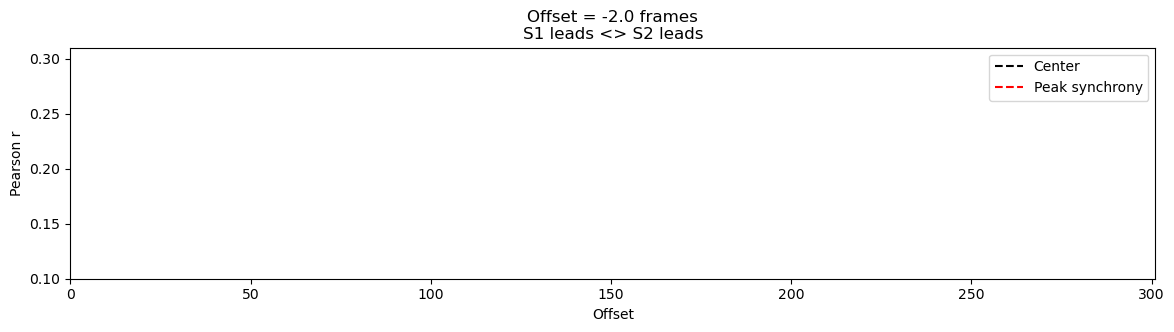

In [38]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['sentiment avg']
d2 = df['Close']
seconds = 30
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [40]:
df.head(1)

,Date,Stock Name,sentiment avg,label,sentiment pct,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,0.688692,bearish,0.306551,27.8475,27.860001,26.8375,27.3325,24.60321,212818400


In [44]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

In [79]:
lag = 0

df = tweets_df.copy()
df['stock_lagged'] = df['Close'].shift(lag)
df['sentiment_lagged'] = df['sentiment avg'].shift(lag)
# df = df.dropna()
X = df[['stock_lagged']]
y = df['sentiment_lagged']

# model = ols.fit(X, y)
model = sm.OLS(X, y, missing='drop').fit()
lag_coeff = model.params[0]
print(lag_coeff)

In [80]:
# model = ols.fit(X, y)
model = sm.OLS(X, y, missing='drop').fit()
lag_coeff = model.params[0]
print(lag_coeff)

149.77212333892172


In [110]:
df[['Date', 'sentiment avg', 'Close']].groupby(['Date']).mean()

,sentiment avg,Close
Date,,
2015-01-02,0.708464,37.141709
2015-01-05,0.741353,54.670647
2015-01-06,0.673837,48.118235
2015-01-07,0.703535,53.828323
2015-01-08,0.737492,55.651891
...,...,...
2023-02-23,0.837270,169.122354
2023-02-24,0.813774,170.916110
2023-02-27,0.861648,171.488333


In [196]:
df = tweets_df.copy()
company = 'NFLX'
df[df['Stock Name'] == company]

,Date,Stock Name,sentiment avg,label,sentiment pct,Open,High,Low,Close,Adj Close,Volume
305,2015-01-27,NFLX,0.996737,bullish,1.000000,63.087143,65.339996,63.049999,64.881432,64.881432,24612700
362,2015-01-30,NFLX,0.608783,bearish,0.333333,63.132858,63.984287,62.655712,63.114285,63.114285,13215300
363,2015-01-30,NFLX,0.608783,bullish,0.666667,63.132858,63.984287,62.655712,63.114285,63.114285,13215300
1391,2015-04-13,NFLX,0.020755,bearish,1.000000,67.239998,69.285713,67.057144,67.811432,67.811432,44436700
1414,2015-04-14,NFLX,0.377535,bearish,1.000000,68.857140,69.142860,67.421432,68.387146,68.387146,28641900
...,...,...,...,...,...,...,...,...,...,...,...
46533,2023-02-27,NFLX,0.822864,bullish,0.831138,323.869995,330.000000,322.119995,323.029999,323.029999,6142600
46568,2023-02-28,NFLX,0.827524,bearish,0.169014,323.700012,327.619995,321.170013,322.130005,322.130005,3676100
46569,2023-02-28,NFLX,0.827524,bullish,0.830986,323.700012,327.619995,321.170013,322.130005,322.130005,3676100
46603,2023-03-01,NFLX,0.723049,bearish,0.282609,321.549988,326.600006,312.359985,313.480011,313.480011,4902000


In [239]:
company = 'AAPL'
data = df[df['Stock Name'] == company]
data = data[['Date', 'sentiment avg', 'Close']].groupby(['Date']).mean()
results = grangercausalitytests(data, maxlag=1, verbose=True)
results[1][0]['params_ftest'][0]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.3634 , p=0.0000  , df_denom=1755, df_num=1
ssr based chi2 test:   chi2=17.3931 , p=0.0000  , df=1
likelihood ratio test: chi2=17.3076 , p=0.0000  , df=1
parameter F test:         F=17.3634 , p=0.0000  , df_denom=1755, df_num=1


17.36339689608771

In [286]:
coefs = []
company = 'TSLA'
data = df[df['Stock Name'] == company]
data = data[['Date', 'sentiment avg', 'Close']].groupby(['Date']).mean()
results = grangercausalitytests(data, maxlag=2, verbose=False)
# results[1][0]['params_ftest'][0]

for idx in range(2):
    pval = [results[i+1][0]['ssr_ftest'][idx] for i in range(2)]
    granger_causality_coef = 1 - pval[1] / pval[0]
    coefs.append(granger_causality_coef)
    
coefs

[0.6951125386200292, -207800165026643.7]

In [295]:
topics_stats = pd.read_csv('./data/cleaned_up_data/topics/final_sent_topic_stats_summary.csv', index_col='Type')
topics_df = pd.read_csv('./data/cleaned_up_data/topics/final_sent_topic_chart_summary.csv')

In [319]:
topics_df

,Date,GDP,CPI,inflation,housing,federal_funds,bank_loan,employment_rate,unemployment_rate,consumer_confidence,bonds_price,mortgage_rates,public_debt,total_debt,debt,bonds_issued,IRS Tax,bonds_sentiment,economy_sentiment,housing_market_sentiment,taxes_sentiment,loans_sentiment,interest_rates_sentiment,recession_sentiment,unemployment_sentiment,inflation_sentiment
0,2022-03-01,2.500000e+13,283716.0,6.4,800000.0,0.2,3.37,60.1,3.6,59.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584778,NaN,0.706651,0.676458,0.900862,0.501457,0.172335,0.541355,NaN
1,2022-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.90,NaN,2.380000e+13,3.030000e+13,3.023333e+13,NaN,NaN,0.566698,NaN,0.849652,0.654129,0.845383,0.354491,0.155973,0.393220,NaN
2,2022-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.22,3.76,2.380000e+13,3.020000e+13,3.023333e+13,NaN,NaN,0.581392,NaN,0.680140,0.659412,0.810151,0.506376,0.175051,0.454476,NaN
3,2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.87,NaN,2.380000e+13,3.020000e+13,3.026667e+13,NaN,NaN,0.544415,NaN,0.617369,0.659490,0.827969,0.452509,0.120943,0.566142,NaN
4,2022-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.517237,NaN,0.657930,0.568856,0.830977,0.443726,0.184526,0.485745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2023-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444285,0.566272,0.886860,0.611617,0.865967,0.490267,0.337674,0.408306,0.342906
363,2023-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.87,NaN,2.460000e+13,3.150000e+13,3.150000e+13,NaN,1.784586e+10,0.998811,NaN,0.823758,0.620325,0.798119,NaN,NaN,NaN,0.374881
364,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.15,NaN,2.460000e+13,3.150000e+13,3.150000e+13,NaN,1.704603e+10,NaN,NaN,0.703924,0.657900,0.800795,NaN,NaN,NaN,0.452120
365,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421.35,NaN,2.470000e+13,3.150000e+13,NaN,NaN,2.096256e+10,NaN,NaN,NaN,0.558034,0.839989,NaN,NaN,NaN,NaN


In [321]:
data

,IRS Tax,taxes_sentiment
Date,,
2022-03-01,NaN,0.676458
2022-03-02,NaN,0.654129
2022-03-03,NaN,0.659412
2022-03-04,NaN,0.659490
2022-03-05,NaN,0.568856
...,...,...
2023-02-26,1.646115e+10,0.611617
2023-02-27,1.784586e+10,0.620325
2023-02-28,1.704603e+10,0.657900


In [365]:
def topic_granger_causality(topic, comparison_data):
        coefs = []

        data = topics_df[['Date', comparison_data, f'{topic}_sentiment']].groupby(['Date']).mean().dropna()
        # data = data.dropna(how='all').fillna(method='ffill').dropna()
        results = grangercausalitytests(data, maxlag=2, verbose=False)

        for idx in range(2):
            pval = [results[i+1][0]['ssr_ftest'][idx] for i in range(2)]
            granger_causality_coef = 1 - pval[1] / pval[0]
            coefs.append(granger_causality_coef)
            
        return f'{round(max(coefs), 2):.2f}'

In [374]:
data = topics_df[['Date', 'GDP', f'economy_sentiment']].groupby(['Date']).mean().dropna()
data

,GDP,economy_sentiment
Date,,
2022-04-01,2.500000e+13,0.516947
2022-05-01,2.520000e+13,0.529374
2022-06-01,2.550000e+13,0.559904
2022-07-01,2.550000e+13,0.481865
2022-08-01,2.590000e+13,0.529836
2022-09-01,2.580000e+13,0.520942
2022-10-01,2.610000e+13,0.498249
2022-11-01,2.620000e+13,0.536756
2022-12-01,2.610000e+13,0.546435


In [384]:
topics_df[['Date', 'GDP', f'economy_sentiment']].groupby(['Date']).mean().dropna()

{1: ({'ssr_ftest': (0.0, 1.0, 7.0, 1),
   'ssr_chi2test': (0.0, 1.0, 1),
   'lrtest': (-0.0, 1.0, 1),
   'params_ftest': (158508.18837768986, 1.6654614157421828e-16, 7.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (-1.7274339470982042e-14, 1.0, 6.0, 2),
   'ssr_chi2test': (-4.6064905255952113e-14, 1.0, 2),
   'lrtest': (-0.0, 1.0, 2),
   'params_ftest': (98869.14272525001, 2.7934565826194548e-14, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

0      2022-03
1      2022-03
2      2022-03
3      2022-03
4      2022-03
        ...   
362    2023-02
363    2023-02
364    2023-02
365    2023-03
366    2023-03
Name: Date, Length: 367, dtype: object

In [387]:
topics_df[['Date', 'GDP', f'economy_sentiment']]

,Date,GDP,economy_sentiment
0,2022-03-01,2.500000e+13,NaN
1,2022-03-02,NaN,NaN
2,2022-03-03,NaN,NaN
3,2022-03-04,NaN,NaN
4,2022-03-05,NaN,NaN
...,...,...,...
362,2023-02-26,NaN,0.566272
363,2023-02-27,NaN,NaN
364,2023-02-28,NaN,NaN
365,2023-03-01,NaN,NaN


In [385]:
data = topics_df[['Date', 'GDP', f'economy_sentiment']].groupby(['Date']).mean().dropna()
        # data = data.dropna(how='all').fillna(method='ffill').dropna()
results = grangercausalitytests(data, maxlag=2, verbose=False)

for idx in range(2):
    pval = [results[i+1][0]['ssr_ftest'][idx] for i in range(2)]
    granger_causality_coef = 1 - pval[1] / pval[0]
    print(pval, granger_causality_coef)
    coefs.append(granger_causality_coef)

[0.0, -1.7274339470982042e-14] inf
[1.0, 1.0] 0.0


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_6123/789642444.py:7: RuntimeWarning:

divide by zero encountered in scalar divide



In [345]:
def topic_granger_causality(topic, comparison_data):
    coefs = []
    data = 
    data = topics_df[['Date', comparison_data, f'{topic}_sentiment']].groupby(['Date']).mean().dropna()
#     data = data.dropna(how='all').fillna(method='ffill').dropna()
    results = grangercausalitytests(data, maxlag=2, verbose=False)

    for idx in range(2):
        pval = [results[i+1][0]['ssr_ftest'][idx] for i in range(2)]
        granger_causality_coef = 1 - pval[1] / pval[0]
        coefs.append(granger_causality_coef)

    return max(coefs)

In [346]:
topic_granger_causality('taxes', 'GDP')

/Users/setone/miniforge3/envs/tf-gpu/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1



0.9563393359007127

In [336]:
topics_df[['Date', 'GDP', f'taxes_sentiment']].groupby(['Date']).mean().dropna()

,GDP,taxes_sentiment
Date,,
2022-03-01,2.500000e+13,0.676458
2022-04-01,2.500000e+13,0.535847
2022-05-01,2.520000e+13,0.568662
2022-06-01,2.550000e+13,0.617256
2022-07-01,2.550000e+13,0.606112
2022-08-01,2.590000e+13,0.563881
2022-09-01,2.580000e+13,0.636595
2022-10-01,2.610000e+13,0.576804
2022-11-01,2.620000e+13,0.545065


In [332]:
np.correlate()

array([24.90546713])

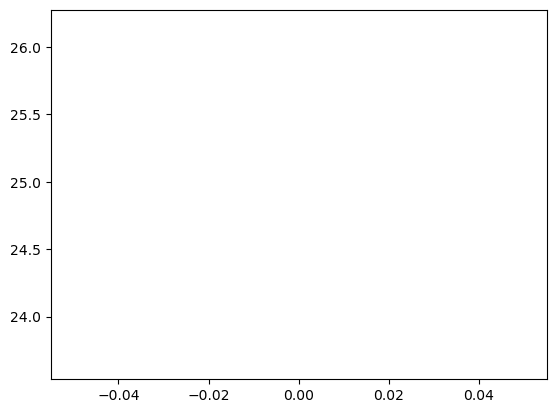

In [331]:
import numpy as np

# generate two random time series
ts1 = np.random.rand(100)
ts2 = np.random.rand(100)

# compute cross-correlation with a lag of 5
lag = 5
corr = np.correlate(ts1, np.roll(ts2, -lag), mode='valid')

# plot the cross-correlation
import matplotlib.pyplot as plt
plt.plot(corr)
plt.show()

In [327]:
coefs = []
compare_to = 'GDP'
topic = 'taxes'
data = topics_df[['Date', compare_to, f'{topic}_sentiment']].groupby(['Date']).mean()
data = data.dropna(how='all').fillna(method='ffill').dropna()
results = grangercausalitytests(data, maxlag=2, verbose=False)

for idx in range(2):
    pval = [results[i+1][0]['ssr_ftest'][idx] for i in range(2)]
    granger_causality_coef = 1 - pval[1] / pval[0]
    coefs.append(granger_causality_coef)
    
coefs

[-1.119033218224875, 0.07349301856429014]

In [313]:
GDP_causality = topics_df[['Date', 'GDP', 'taxes_sentiment']].groupby(['Date']).mean()
GDP_causality = GDP_causality.dropna(how='all').fillna(method='ffill')
results = grangercausalitytests(GDP_causality, maxlag=2, verbose=False)

In [312]:
results

{1: ({'ssr_ftest': (0.2797762515198266, 0.5971720727172453, 362.0, 1),
   'ssr_chi2test': (0.28209483923960416, 0.5953314607390279, 1),
   'lrtest': (0.2819858850998571, 0.5954025417974548, 1),
   'params_ftest': (0.27977625151874713, 0.5971720727179572, 362.0, 1.0)},
   array([[0., 1., 0.]])])}

In [315]:
granger_coefs = []
for idx in range(2):
    pval = [results[i+1][0]['ssr_ftest'][idx] for i in range(2)]
    granger_causality_coef = 1 - pval[1] / pval[0]
    granger_coefs.append(granger_causality_coef)
    
max(granger_coefs)

0.07349301856429014

In [289]:
lag_data = df[['Date', 'sentiment avg', 'Close']].groupby(['Date']).mean()
results = grangercausalitytests(lag_data, maxlag=1, verbose=False)
corr_coef = round(lag_data['sentiment avg'].corr(lag_data['Close']), 2)

granger_coefs = []
for idx in range(2):
    pval = [results[i+1][0]['ssr_ftest'][idx] for i in range(2)]
    granger_causality_coef = 1 - pval[1] / pval[0]
    granger_coefs.append(granger_causality_coef)

KeyError: 2

In [272]:
[results[i+1][0]['ssr_ftest'][1] for i in range(2)]

[1.5794349741302504e-36, 3.282068482731203e-22]

In [265]:
pval[1][1] / pval[0][0]

1.9648086950672996e-24

In [225]:
from fastdtw import fastdtw
import numpy as np

# Define the two time series
sentiment_scores = np.array([0.5, 0.8, 0.2, 0.4, 0.6])
stock_prices = np.array([10.0, 12.0, 8.0, 9.0, 11.0])

# Calculate the DTW distance between the two time series
distance, _ = fastdtw(sentiment_scores, stock_prices)

# Calculate the DTW coefficient between the two time series
coefficient = 1 / (1 + distance)

print("DTW coefficient:", coefficient)

DTW coefficient: 0.020618556701030927


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [232]:
company = 'TSLA'
data = df[df['Stock Name'] == company]

distance, _ = fastdtw(data['sentiment avg'], data['Close'])
corr_coef = 1 / (1+distance)
corr_coef

3.62673796164924e-06